In [28]:
#installation of necessary libraries

In [9]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\MONSTER\Desktop\Bank_Personal_Loan_Modelling.csv")
df = data.copy()
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [29]:
#Removing unnecessary variables

In [10]:
df.drop(["ID","ZIP Code"], axis = 1, inplace = True)

In [11]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [ ]:
#There is no non-null count

In [13]:
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

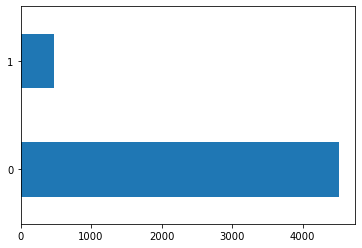

In [14]:
df["Personal Loan"].value_counts().plot.barh();

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Determination of dependent and independent variables

In [16]:
y = df["Personal Loan"]
x = df.drop("Personal Loan", axis=1)

## StatsModel

In [17]:
loj = sm.Logit(y,x)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.133520
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4989
Method:                           MLE   Df Model:                           10
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                  0.5777
Time:                        18:09:41   Log-Likelihood:                -667.60
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.5068      0.022    -23.028      0.000      -0.550      -0.464
Experience             0.5080      0.024     20.829      0.000       0.460       0.556
Income                 0.0515      0.003     20.537      0.000       0.047       0.056
Family                 0.6323      0.071      8.855      0.000       0.492       0.772
CCAvg                  0.1115      0.039      2.871      0.004       0.035       0.188
Education              1.7301      0.111     15.577      0.000       1.512       1.948
Mortgage               0.0006      0.001      1.040      0.298      -0.001       0.002
Securities Account    -1.0120      0.283     -3.575      0.000      -1.567      -0.457
CD Account             3.8155      0.319     11.977      0.000       3.191       4.440
Online                -0.7169      0.154     -4.659      0.000      -1.019      -0.415
CreditCard            -1.1676      0.201     -5.801      0.000      -1.562      -0.773
======================================================================================
"""

In [18]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(x,y)
loj_model
print(loj_model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [19]:
loj_model.intercept_

array([-3.1338902])

In [20]:
loj_model.coef_

array([[-3.78168260e-01,  3.81477485e-01,  5.09204246e-02,
         6.29689568e-01,  1.12613070e-01,  1.67327501e+00,
         5.60130572e-04, -7.68686764e-01,  3.37183194e+00,
        -6.27180625e-01, -9.89311591e-01]])

### PREDICTION

In [21]:
y_pred = loj_model.predict(x)

In [22]:
confusion_matrix(y,y_pred)

array([[4456,   64],
       [ 184,  296]], dtype=int64)

In [30]:
#95 percent prediction success was achieved

In [23]:
accuracy_score(y, y_pred)     

0.9504

In [24]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4520
           1       0.82      0.62      0.70       480

    accuracy                           0.95      5000
   macro avg       0.89      0.80      0.84      5000
weighted avg       0.95      0.95      0.95      5000



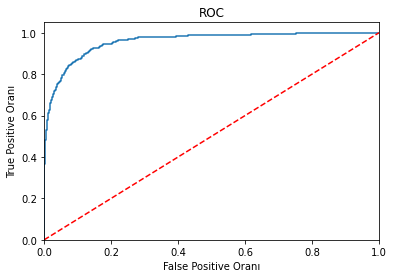

In [25]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(x))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()